# METAVERSE FINANCIAL TRANSACTION - RISK ASSESSMENT


Blockchain financial transactions within the Open Metaverse involve the use of blockchain technology to enable secure, transparent, and decentralized transactions in virtual environments. Utilizing blockchain ensures that users can exchange digital assets, conduct virtual commerce, and participate in financial activities with confidence, as their transactions are recorded immutably on a distributed ledger. This fosters integrity, reduces the risk of fraud, and facilitates seamless cross-platform transactions across various virtual worlds within the Open Metaverse. Additionally, blockchain-powered smart contracts allow for the automated execution of agreements, further enhancing the efficiency and reliability of financial interactions within this digital ecosystem. As the Open Metaverse continues to develop, blockchain technology is poised to play a crucial role in shaping its financial infrastructure.

## OBJECTIVE

The dataset's purpose, which is appropriate for classification analysis, is to forecast the risk associated with blockchain financial transactions in the Open Metaverse. This requires categorizing transactions into different risk levels based on a variety of criteria, including as transaction kinds, amounts, user activity profiles, geographical regions, and IP addresses. Using this dataset to develop a classification model allows for the creation of a predictive framework that automatically classifies transactions as low, moderate, or high risk, thereby improving fraud detection, risk evaluation, and overall security management within virtual ecosystems.

## INTRODUCTION

### Working of Blockchain Transaction


1. Users send transactions, specifying recipient, amount, and details.
2. Nodes verify transaction authenticity and compliance with network rules.
3. Valid transactions are bundled into blocks by miners.
4. Miners solve puzzles to append blocks to the blockchain.
5. Network achieves consensus on block validity.
6. Valid blocks are added to the blockchain ledger.
7. Transactions become immutable within the distributed ledger system.

### Dataset Source

This dataset provides blockchain financial transactions within the Open Metaverse, aiming to provide a rich, diverse, and realistic set of data for developing and testing anomaly detection models, fraud analysis, and predictive analytics in virtual environments. With a focus on applicability, this dataset captures various transaction types, user behaviors, and risk profiles across a global network.

Transactions were extracted using a sophisticated model that incorporates distributions, behavioral patterns, and risk assessments. The model ensures a diverse representation of activities, from typical transactions to potential fraudulent activities, across different user groups and global regions.

**Acknowledgements** : This dataset is shared by the Open Metaverse, a collaborative initiative dedicated to the advancement and democratization of virtual worlds. For more information, visit https://www.openmv.org/.

### Data Overview

* **Timestamp**: Date and time of the transaction.
* **Hour of Day**: Hour part of the transaction timestamp.
* **Sending Address**: Blockchain address of the sender.
* **Receiving Address**: Blockchain address of the receiver.
* **Amount**: Transaction amount in a simulated currency.
* **Transaction Type**: Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing).
* **Location Region**: Simulated geographical region of the transaction.
* **IP Prefix**: Simulated IP address prefix for the transaction.
* **Login Frequency**: Frequency of login sessions by the user, varying by age group.
* **Session Duration**: Duration of activity sessions in minutes.
* **Purchase Pattern**: Behavioral pattern of purchases (e.g., focused, random, high-value).
* **Age Group**: Categorization of users into new, established, and veteran based on their activity history.
* **Risk Score**: Calculated risk score based on transaction characteristics and user behavior.
* **Anomaly**: Risk level assessment (e.g., high_risk, moderate_risk, low_risk).

## DATA LOADING AND PREPARATION

In [73]:
#import all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# To ignore all warnings
warnings.filterwarnings("ignore")

In [74]:
# Load the dataset from csv
df = pd.read_csv('metaverse_transactions_dataset.csv')

df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [75]:
# shape of the dataset

df.shape

(78600, 14)

In [76]:
# Check for duplicate rows

df.duplicated().sum()

0

In [77]:
df.nunique()

timestamp            78513
hour_of_day             24
sending_address       1161
receiving_address     1166
amount               76771
transaction_type         5
location_region          5
ip_prefix                5
login_frequency          8
session_duration       140
purchase_pattern         3
age_group                3
risk_score              31
anomaly                  3
dtype: int64

In [78]:
# check for inconsistencies

# Filter columns with less than 6 unique values
columns_with_few_unique_values = df.columns[df.nunique() < 6]

for col in columns_with_few_unique_values:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'transaction_type': ['transfer' 'purchase' 'sale' 'phishing' 'scam']
Unique values in 'location_region': ['Europe' 'South America' 'Asia' 'Africa' 'North America']
Unique values in 'ip_prefix': [192.    172.    192.168 172.16   10.   ]
Unique values in 'purchase_pattern': ['focused' 'high_value' 'random']
Unique values in 'age_group': ['established' 'veteran' 'new']
Unique values in 'anomaly': ['low_risk' 'moderate_risk' 'high_risk']


In [79]:
# Check for missing values in each column

df.isnull().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

In [80]:
# Look at the data types and the not null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [81]:
# Convert 'timestamp' column to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [82]:
# Select numeric columns for outlier detection
numeric_cols = ['amount', 'login_frequency', 'session_duration']

# Calculate summary statistics for numeric columns
summary_stats = df[numeric_cols].describe()

# Calculate interquartile range (IQR) for each numeric column
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in each numeric column
outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

# Print columns with outliers and their counts
print("Columns with outliers:")
print(outliers.sum())

Columns with outliers:
amount              274
login_frequency       0
session_duration      0
dtype: int64


In [83]:
# Filter DataFrame to exclude rows with 'amount' outliers

df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

In [84]:
df.shape

(78326, 14)

## EXPLORATORY DATA ANALYSIS (EDA)

In [85]:
df.describe()

,timestamp,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78326,78326.000000,78326.000000,78326.000000,78326.000000,78326.000000,78326.000000
mean,2022-07-02 16:14:01.707861760,11.530437,499.939127,147.619081,4.178868,69.685047,44.938158
min,2022-01-01 00:00:45,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,2022-04-02 01:59:11,6.000000,330.638326,172.000000,2.000000,35.000000,26.250000
50%,2022-07-02 19:09:51.500000,12.000000,499.000898,172.160000,4.000000,60.000000,40.000000
75%,2022-10-02 10:21:39.750000128,18.000000,667.521701,192.000000,6.000000,100.000000,52.500000
max,2022-12-31 23:47:40,23.000000,1176.785115,192.168000,8.000000,159.000000,100.000000
std,NaN,6.935949,242.212772,69.407548,2.365639,40.525897,21.773852


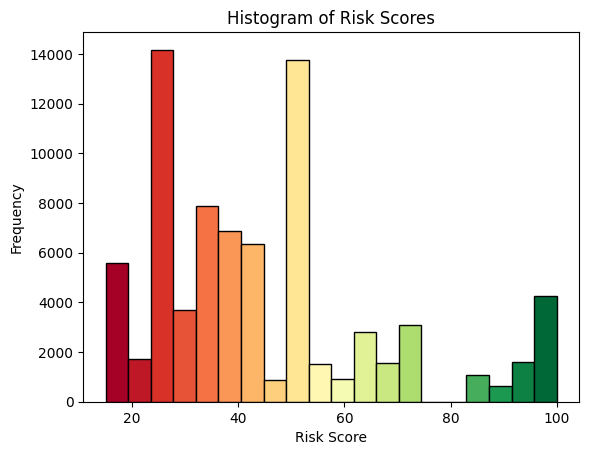

In [86]:
# Create histogram for risk score
num_bins = 20
colors = plt.cm.RdYlGn(np.linspace(0, 1, num_bins))

n, bins, patches = plt.hist(df['risk_score'], bins=num_bins, edgecolor='black')

for i in range(num_bins):
    patches[19 - i].set_facecolor(colors[19 - i])

plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Histogram of Risk Scores')

plt.show()


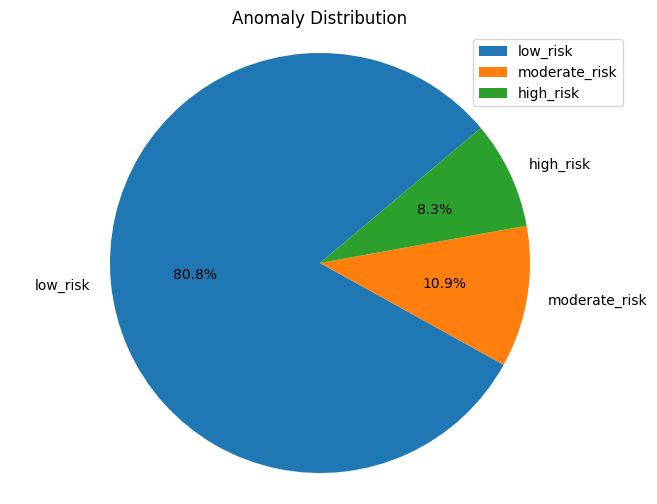

In [87]:
# Plot pie chart for different anomaly

anomaly_counts = df['anomaly'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(anomaly_counts, labels=anomaly_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Anomaly Distribution')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

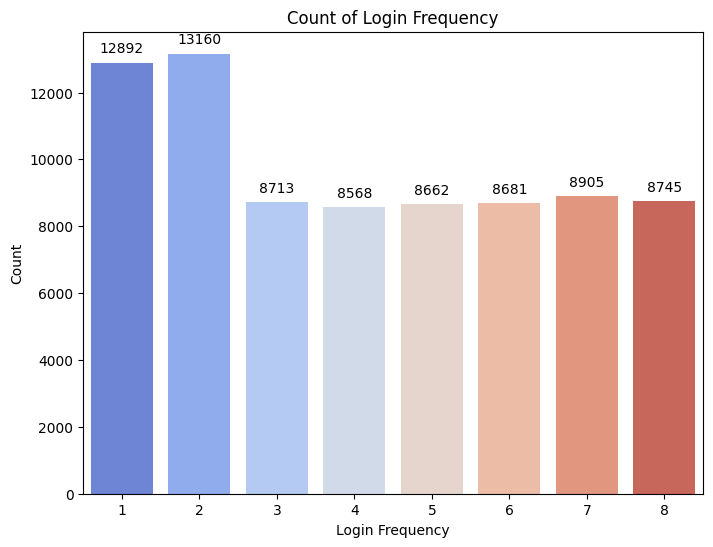

In [88]:
# Plot count of login frequency with count number on top of each bar
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='login_frequency', palette='coolwarm')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Count of Login Frequency')
plt.xlabel('Login Frequency')
plt.ylabel('Count')
plt.show()

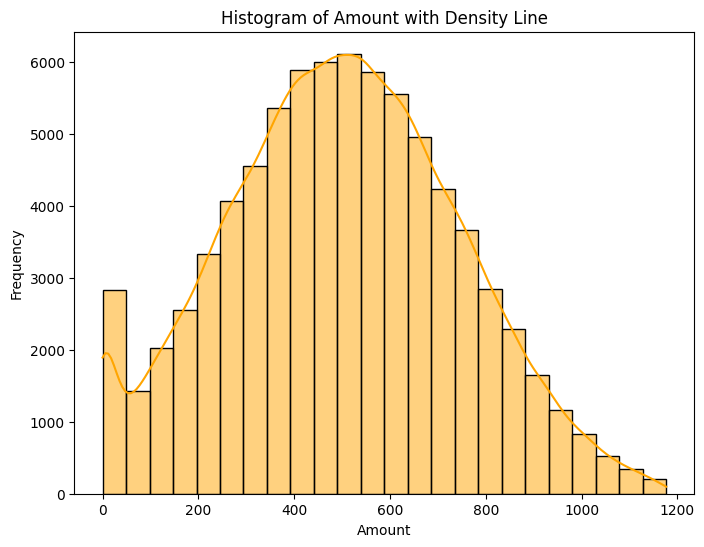

In [89]:
# Define a color palette
palette = "muted"

# Plot histogram of amount with density line
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='amount', bins=24, kde=True, color='orange', palette=palette)
plt.title('Histogram of Amount with Density Line')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

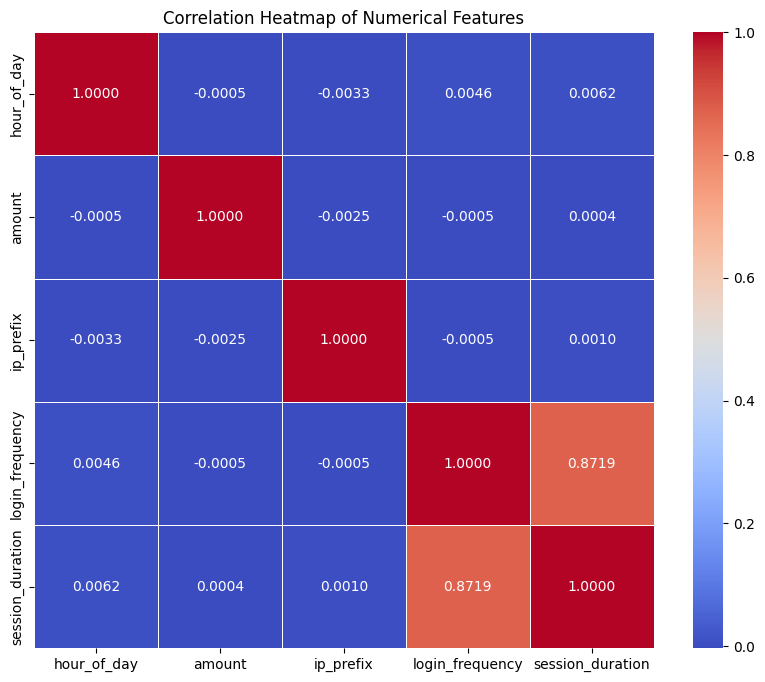

In [90]:
# Extracting numerical features into a new DataFrame X_Numerical
X_Numerical = df[['hour_of_day', 'amount', 'ip_prefix', 'login_frequency', 'session_duration']]

# Calculate the correlation matrix
correlation_matrix = X_Numerical.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

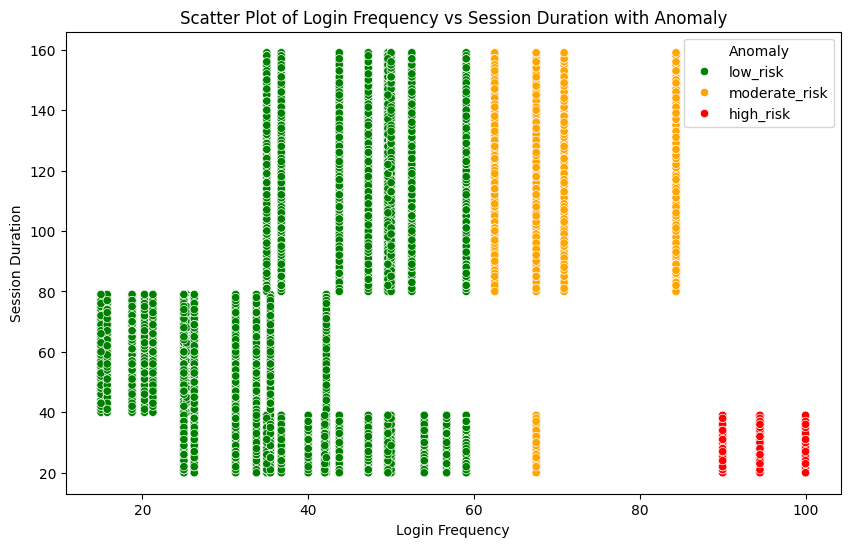

In [91]:
# Define custom color palette
custom_palette = {'low_risk': 'green', 'moderate_risk': 'orange', 'high_risk': 'red'}

# Plot scatter plot of login frequency vs session duration with hue as anomaly
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='risk_score', y='session_duration', hue='anomaly', palette=custom_palette)
plt.title('Scatter Plot of Login Frequency vs Session Duration with Anomaly')
plt.xlabel('Login Frequency')
plt.ylabel('Session Duration')
plt.legend(title='Anomaly')
plt.show()

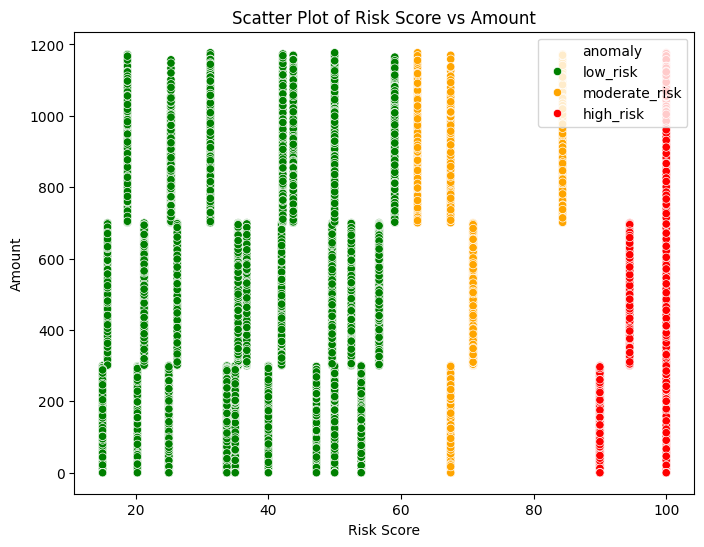

In [92]:
# Define custom color palette
custom_palette = {'low_risk': 'green', 'moderate_risk': 'orange', 'high_risk': 'red'}

# Plot scatter plot of risk score vs amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='risk_score', y='amount',hue='anomaly', palette=custom_palette)
plt.title('Scatter Plot of Risk Score vs Amount')
plt.xlabel('Risk Score')
plt.ylabel('Amount')
plt.show()

## FEATURE ENGINEERING

In [93]:
# Convert the timestamp column to other columns and remove unwanted features
X = df.copy()


X['month'] = X['timestamp'].dt.month
X['day'] = X['timestamp'].dt.day

X.drop(columns=['timestamp','sending_address','receiving_address'], inplace=True)

X.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,month,day
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,4,11
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,6,14
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,1,18
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,6,15
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,2,18


In [94]:
# Extracting the target variable 'anomaly' into a new DataFrame Y
Y = X[['anomaly']]

# Extracting categorical features into a new DataFrame X_Categorical
X_Categorical = X[['transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'month', 'day']]

# Extracting numerical features into a new DataFrame X_Numerical
X_Numerical = X[['hour_of_day', 'amount', 'ip_prefix', 'login_frequency', 'session_duration']]


In [95]:
# One-hot encoding for categorical features
categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = encoder.fit_transform(X_Categorical)

# Concatenate the encoded features with the original DataFrame
X_Categorical_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
#X_Categorical_encoded['month_sin'] = X_Categorical['month_sin']
#X_Categorical_encoded['month_cos'] = X_Categorical['month_cos']

# Update X_Categorical with the encoded features
X_Categorical = X_Categorical_encoded

# Display the updated DataFrame
X_Categorical.columns

Index(['cat__transaction_type_phishing', 'cat__transaction_type_purchase',
       'cat__transaction_type_sale', 'cat__transaction_type_scam',
       'cat__transaction_type_transfer', 'cat__location_region_Africa',
       'cat__location_region_Asia', 'cat__location_region_Europe',
       'cat__location_region_North America',
       'cat__location_region_South America', 'cat__purchase_pattern_focused',
       'cat__purchase_pattern_high_value', 'cat__purchase_pattern_random',
       'cat__age_group_established', 'cat__age_group_new',
       'cat__age_group_veteran', 'remainder__month', 'remainder__day'],
      dtype='object')

In [96]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define the columns to scale
columns_to_scale = X_Numerical.columns

# Fit and transform the numerical features
X_Numerical[columns_to_scale] = scaler.fit_transform(X_Numerical[columns_to_scale])

X_Numerical.columns

Index(['hour_of_day', 'amount', 'ip_prefix', 'login_frequency',
       'session_duration'],
      dtype='object')

In [97]:
# Define a dictionary to map the risk levels to numerical labels
risk_mapping = {'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2}

# Replace the values in the 'anomaly' column using the mapping
Y['anomaly'] = Y['anomaly'].map(risk_mapping)


In [98]:
X_Combined = X_Numerical.copy()
for col in X_Categorical.columns:
    X_Combined[col] = X_Categorical[col].values

X_Combined.shape

(78326, 23)

## LOGISTIC REGRESSION

In [99]:
def train_logistic_regression(X, Y):
    # Encode target variable 'Y' into numerical labels
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

    # Train logistic regression model
    log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
    log_reg_model.fit(X_train, Y_train)
    Y_pred = log_reg_model.predict(X_test)

    # Evaluate the model
    train_accuracy = log_reg_model.score(X_train, Y_train)

    return log_reg_model, train_accuracy, X_test, Y_test, Y_pred



In [100]:
def evaluate_classification_model(model, X_test, Y_test, Y_pred):

    unique_values = Y['anomaly'].unique()
    Y_unique_array = np.array(unique_values)

    # Generate classification report
    report = classification_report(Y_test, Y_pred, target_names=Y_unique_array, output_dict=True, zero_division=0)

    # Extract overall metrics
    overall_precision = report['weighted avg']['precision']
    overall_recall = report['weighted avg']['recall']
    overall_accuracy = report['accuracy']
    overall_f1_score = report['weighted avg']['f1-score']
    print("Test Data Predictions : \n")
    print("Overall Accuracy:", overall_accuracy)
    print("Overall Precision:", overall_precision)
    print("Overall Recall:", overall_recall)
    print("Overall F1 Score:", overall_f1_score)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)

    return overall_accuracy, overall_precision, overall_recall

In [101]:
# Build the model using categorical values and predict
log_reg_model, train_accuracy, X_test, Y_test, Y_pred = train_logistic_regression(X_Categorical, Y)
print("Logistic regression using Categorical values")
print("Training accuracy:", train_accuracy)
evaluate_classification_model(log_reg_model, X_test, Y_test, Y_pred)


Logistic regression using Categorical values
Training accuracy: 0.892451324609001
Test Data Predictions : 

Overall Accuracy: 0.8851653261840929
Overall Precision: 0.7846959661985744
Overall Recall: 0.8851653261840929
Overall F1 Score: 0.8315789349831233
Confusion Matrix:
[[12582     0     0]
 [ 1799     0     0]
 [    0     0  1285]]


(0.8851653261840929, 0.7846959661985744, 0.8851653261840929)

In [102]:
# Build the model using Numerical values and predict
log_reg_model, train_accuracy, X_test, Y_test, Y_pred = train_logistic_regression(X_Numerical, Y)
print("Logistic regression using Numerical values")
print("Training accuracy:", train_accuracy)
evaluate_classification_model(log_reg_model, X_test, Y_test, Y_pred)

Logistic regression using Numerical values
Training accuracy: 0.82979572294925
Test Data Predictions : 

Overall Accuracy: 0.8244606153453339
Overall Precision: 0.7475992660042964
Overall Recall: 0.8244606153453339
Overall F1 Score: 0.7791922800955114
Confusion Matrix:
[[12181   401     0]
 [ 1064   735     0]
 [ 1285     0     0]]


(0.8244606153453339, 0.7475992660042964, 0.8244606153453339)

In [103]:
# Build the model using both categorical and numerical values and predict
log_reg_model, train_accuracy, X_test, Y_test, Y_pred = train_logistic_regression(X_Combined, Y)
print("Logistic regression using Both Categorical and Numerical values")
print("Training accuracy:", train_accuracy)
lr_accuracy, lr_precision, lr_recall = evaluate_classification_model(log_reg_model, X_test, Y_test, Y_pred)

Logistic regression using Both Categorical and Numerical values
Training accuracy: 0.95638365783594
Test Data Predictions : 

Overall Accuracy: 0.9536576024511682
Overall Precision: 0.9524700999314402
Overall Recall: 0.9536576024511682
Overall F1 Score: 0.9529201392130758
Confusion Matrix:
[[12283   299     0]
 [  427  1372     0]
 [    0     0  1285]]


In [104]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_Combined, Y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    #'penalty': ['l1', 'l2'],  # Penalty norm
    #'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Create logistic regression classifier
log_reg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, Y_train)

# Print the parameters and their respective accuracies
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Parameters:", params, "- Mean Accuracy:", mean_score)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_accuracy = best_model.score(X_test, Y_test)
print("Best Model Accuracy:", best_model_accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Parameters: {'C': 0.1, 'max_iter': 100} - Mean Accuracy: 0.955952760932014
Parameters: {'C': 0.1, 'max_iter': 500} - Mean Accuracy: 0.9562559846792211
Parameters: {'C': 0.1, 'max_iter': 1000} - Mean Accuracy: 0.9562400255346313
Parameters: {'C': 1, 'max_iter': 100} - Mean Accuracy: 0.956271943823811
Parameters: {'C': 1, 'max_iter': 500} - Mean Accuracy: 0.956271943823811
Parameters: {'C': 1, 'max_iter': 1000} - Mean Accuracy: 0.9563676986913501
Parameters: {'C': 10, 'max_iter': 100} - Mean Accuracy: 0.9563038621129907
Parameters: {'C': 10, 'max_iter': 500} - Mean Accuracy: 0.9563836578359399
Parameters: {'C': 10, 'max_iter': 1000} - Mean Accuracy: 0.9563996169805298
Best Hyperparameters: {'C': 10, 'max_iter': 1000}
Best Model Accuracy: 0.9535937699476573


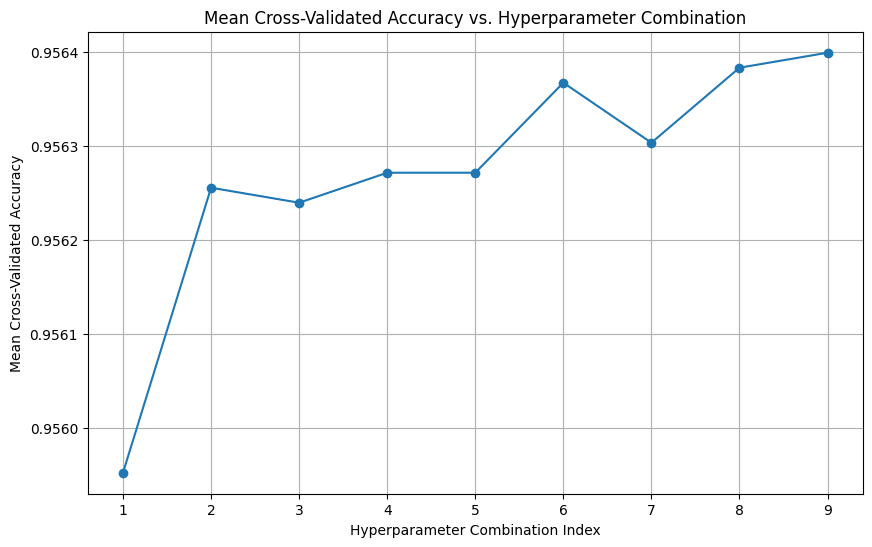

In [105]:
import matplotlib.pyplot as plt

# Get the mean cross-validated scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the mean cross-validated scores for each hyperparameter combination
plt.figure(figsize=(10, 6))
plt.plot(mean_scores, marker='o')
plt.title('Mean Cross-Validated Accuracy vs. Hyperparameter Combination')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(range(len(mean_scores)), range(1, len(mean_scores) + 1))
plt.grid(True)
plt.show()

## KNN

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

def train_evaluate_knn(X_train, Y_train, X_test, Y_test, k=5):
    # Initialize KNN classifier with specified K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, Y_train)

    # Predict the labels for test set
    Y_pred = knn.predict(X_test)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')

    return accuracy, precision, recall, Y_pred

In [107]:
# Split the data into training and testing sets for each set of independent variables
datasets = [
    ("Numerical Features", X_Numerical),
    ("Categorical Features", X_Categorical),
    ("Combined Features", X_Combined)
]

# Initialize lists to store results
accuracies = []
precisions = []
recalls = []

knn_accuracy = 0
knn_precision = 0
knn_recall = 0

# Iterate over datasets and perform KNN classification
for name, X in datasets:
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train and evaluate KNN model
    accuracy, precision, recall, Y_pred = train_evaluate_knn(X_train, Y_train, X_test, Y_test, k=5)

    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(Y_test, Y_pred))

    # Append results to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    knn_accuracy = accuracy
    knn_precision = precision
    knn_recall = recall

    # Print results
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()

Numerical Features Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12582
           1       0.70      0.75      0.72      1799
           2       0.25      0.12      0.16      1285

    accuracy                           0.83     15666
   macro avg       0.61      0.60      0.59     15666
weighted avg       0.81      0.83      0.82     15666

Numerical Features:
Accuracy: 0.8346738159070599
Precision: 0.808243599574405
Recall: 0.8346738159070599

Categorical Features Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     12582
           1       0.45      0.35      0.40      1799
           2       1.00      0.99      0.99      1285

    accuracy                           0.88     15666
   macro avg       0.79      0.76      0.77     15666
weighted avg       0.86      0.88      0.87     15666

Categorical Features:
Accuracy: 0.875207455636

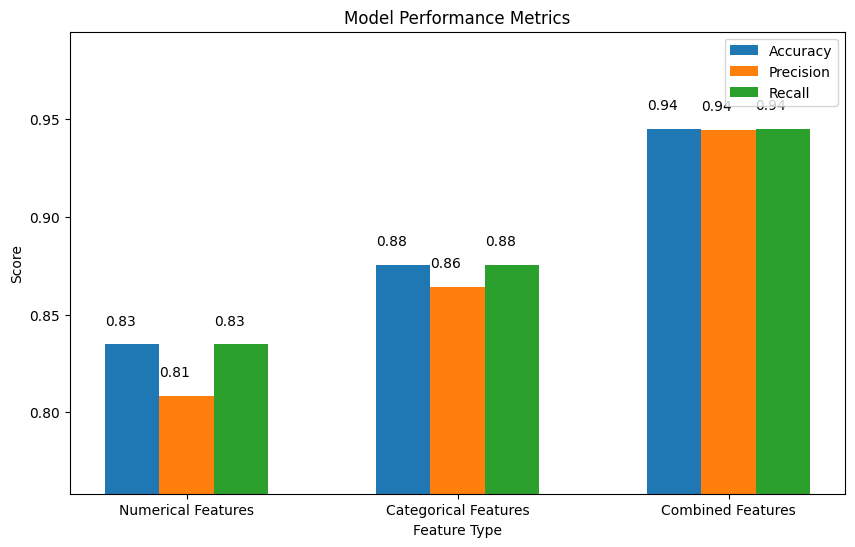

In [108]:
# Plot the results
labels = [name for name, _ in datasets]

x = range(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x, accuracies, width=0.2, label='Accuracy')
plt.bar([i + 0.2 for i in x], precisions, width=0.2, label='Precision')
plt.bar([i + 0.4 for i in x], recalls, width=0.2, label='Recall')

plt.xlabel('Feature Type')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

# Adjust y-axis limits based on the values
plt.ylim(min(min(accuracies), min(precisions), min(recalls)) - 0.05, max(max(accuracies), max(precisions), max(recalls)) + 0.05)

# Annotate bars with their values
for i, (accuracy, precision, recall) in enumerate(zip(accuracies, precisions, recalls)):
    plt.text(i - 0.1, accuracy + 0.01, f'{accuracy:.2f}', color='black')
    plt.text(i + 0.1, precision + 0.01, f'{precision:.2f}', color='black')
    plt.text(i + 0.3, recall + 0.01, f'{recall:.2f}', color='black')

plt.show()


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_with_different_k(X, Y, k_values):
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    results = {}
    # Iterate over different k values
    for k in k_values:
        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        results[k] = accuracy

    return results


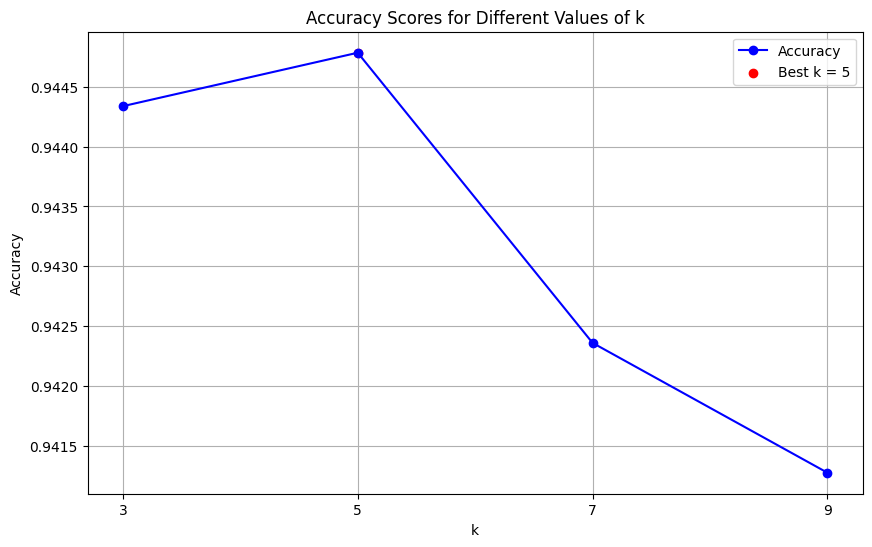

In [110]:
# Define different k values to try
k_values = [3, 5, 7, 9]

# Run KNN with different k values for X_Combined
results_combined = knn_with_different_k(X_Combined, Y, k_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, results_combined.values(), marker='o', linestyle='-', color='b', label='Accuracy')

# Highlight the best k value
best_k = max(results_combined, key=results_combined.get)
plt.scatter(best_k, results_combined[best_k], color='r', label=f'Best k = {best_k}')

plt.title('Accuracy Scores for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## DECISION TREE

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

def train_evaluate_decision_tree(X_train, Y_train, X_test, Y_test):
    # Initialize decision tree classifier
    #clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5,random_state=42)
    clf = DecisionTreeClassifier(max_depth=4,random_state=42)

    # Train the classifier
    clf.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    dt_accuracy = accuracy
    dt_precision = precision
    dt_recall = recall


    # Print classification report
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))

    return Y_pred, accuracy, precision, recall

In [112]:
datasets = [("X_Numerical", X_Numerical), ("X_Categorical", X_Categorical), ("X_Combined", X_Combined)]

for name, X in datasets:
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Print dataset name
    print(f"Decision Tree Classifier Results for {name}:")

    # Call the train_evaluate_decision_tree function
    Y_pred, dt_accuracy, dt_precision, dt_recall = train_evaluate_decision_tree(X_train, Y_train, X_test, Y_test)
    print()

Decision Tree Classifier Results for X_Numerical:
Accuracy: 0.8695263628239499
Precision: 0.8027242692389912
Recall: 0.8695263628239499
F1 Score: 0.8336825382052143
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12582
           1       0.72      0.95      0.82      1799
           2       0.00      0.00      0.00      1285

    accuracy                           0.87     15666
   macro avg       0.54      0.63      0.58     15666
weighted avg       0.80      0.87      0.83     15666


Decision Tree Classifier Results for X_Categorical:
Accuracy: 0.8851653261840929
Precision: 0.7846959661985744
Recall: 0.8851653261840929
F1 Score: 0.8315789349831233
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     12582
           1       0.00      0.00      0.00      1799
           2       1.00      1.00      1.00      1285

    accuracy          

In [113]:
# Define the parameter values to test
param_values = {
    'max_depth': [1, 2, 3, 4, 5]
}

# Define lists to store evaluation metrics
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over different parameter values and train the classifier
for param, values in param_values.items():
    for value in values:
        # Initialize the Decision Tree classifier with the specified parameter value
        dt_classifier = DecisionTreeClassifier(**{param: value})

        # Train the classifier
        dt_classifier.fit(X_train, Y_train)

        # Predict on the training set
        Y_train_pred = dt_classifier.predict(X_train)

        # Predict on the test set
        Y_test_pred = dt_classifier.predict(X_test)

        # Evaluate the classifier
        train_accuracy = accuracy_score(Y_train, Y_train_pred)
        test_accuracy = accuracy_score(Y_test, Y_test_pred)
        precision = precision_score(Y_test, Y_test_pred, average='weighted')
        recall = recall_score(Y_test, Y_test_pred, average='weighted')
        f1 = f1_score(Y_test, Y_test_pred, average='weighted')

        # Append the evaluation metrics to the lists
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print the evaluation metrics along with the parameter value
        print(f"{param}={value}: Train Accuracy={train_accuracy}, Test Accuracy={test_accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1}")



max_depth=1: Train Accuracy=0.8596233641876796, Test Accuracy=0.854461891995404, Precision=0.7619544208608641, Recall=0.854461891995404, F1 Score=0.7995552922780044
max_depth=2: Train Accuracy=0.892451324609001, Test Accuracy=0.8851653261840929, Precision=0.7846959661985744, Recall=0.8851653261840929, F1 Score=0.8315789349831233
max_depth=3: Train Accuracy=0.892451324609001, Test Accuracy=0.8851653261840929, Precision=0.7846959661985744, Recall=0.8851653261840929, F1 Score=0.8315789349831233
max_depth=4: Train Accuracy=0.9449409511650175, Test Accuracy=0.9446572194561471, Precision=0.9418894665945109, Recall=0.9446572194561471, F1 Score=0.9424418545547143
max_depth=5: Train Accuracy=0.9826843281200127, Test Accuracy=0.9812332439678284, Precision=0.9820564115640749, Recall=0.9812332439678284, F1 Score=0.9815035062325415


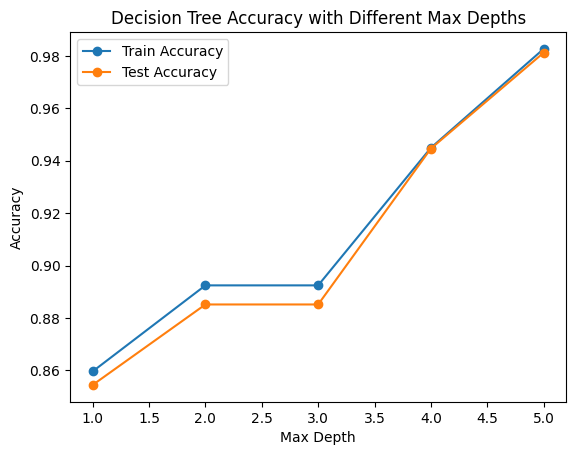

In [114]:
import matplotlib.pyplot as plt

# Plot training and testing accuracies
plt.plot(param_values['max_depth'], train_accuracies, label='Train Accuracy', marker='o')
plt.plot(param_values['max_depth'], test_accuracies, label='Test Accuracy', marker='o')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy with Different Max Depths')

# Add legend
plt.legend()

# Show plot
plt.show()

## SVM

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define a function to train SVM and print evaluation metrics
def train_svm_and_print_metrics(X_train, X_test, y_train, y_test):
    # Create SVM classifier
    svm_classifier = SVC()  # You can adjust SVM parameters here

    # Train SVM classifier
    svm_classifier.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svm_classifier.predict(X_train)

    # Predict on test set
    y_test_pred = svm_classifier.predict(X_test)

    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics scores to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    return test_accuracy, precision, recall


In [116]:
# Define lists to store metric scores
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Split data into train and test sets for each dataset
X_numerical_train, X_numerical_test, y_train, y_test = train_test_split(X_Numerical, Y, test_size=0.2, random_state=42)
X_categorical_train, X_categorical_test, y_train_cat, y_test_cat = train_test_split(X_Categorical, Y, test_size=0.2, random_state=42)
X_combined_train, X_combined_test, y_train_comb, y_test_comb = train_test_split(X_Combined, Y, test_size=0.2, random_state=42)

# Define the list of numerical and categorical features
numeric_features = X_numerical_train.columns
categorical_features = X_categorical_train.columns

# Train SVM and print metrics for each dataset
print("SVM Metrics for Numerical Features:")
train_svm_and_print_metrics(X_numerical_train, X_numerical_test, y_train, y_test)
print("\nSVM Metrics for Categorical Features:")
train_svm_and_print_metrics(X_categorical_train, X_categorical_test, y_train_cat, y_test_cat)
print("\nSVM Metrics for Combined Features:")
svm_accuracy, svm_precision, svm_recall = train_svm_and_print_metrics(X_combined_train, X_combined_test, y_train_comb, y_test_comb)


SVM Metrics for Numerical Features:
Train Accuracy: 0.8598148739227578
Test Accuracy: 0.8593131622622239
Precision: 0.7900726084208843
Recall: 0.8593131622622239
F1 Score: 0.8231421421137793

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12582
           1       0.71      0.82      0.76      1799
           2       0.00      0.00      0.00      1285

    accuracy                           0.86     15666
   macro avg       0.53      0.59      0.56     15666
weighted avg       0.79      0.86      0.82     15666


SVM Metrics for Categorical Features:
Train Accuracy: 0.892451324609001
Test Accuracy: 0.8851653261840929
Precision: 0.7846959661985744
Recall: 0.8851653261840929
F1 Score: 0.8315789349831233

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     12582
           1       0.00      0.00      0.00      1799
           2       1.00 

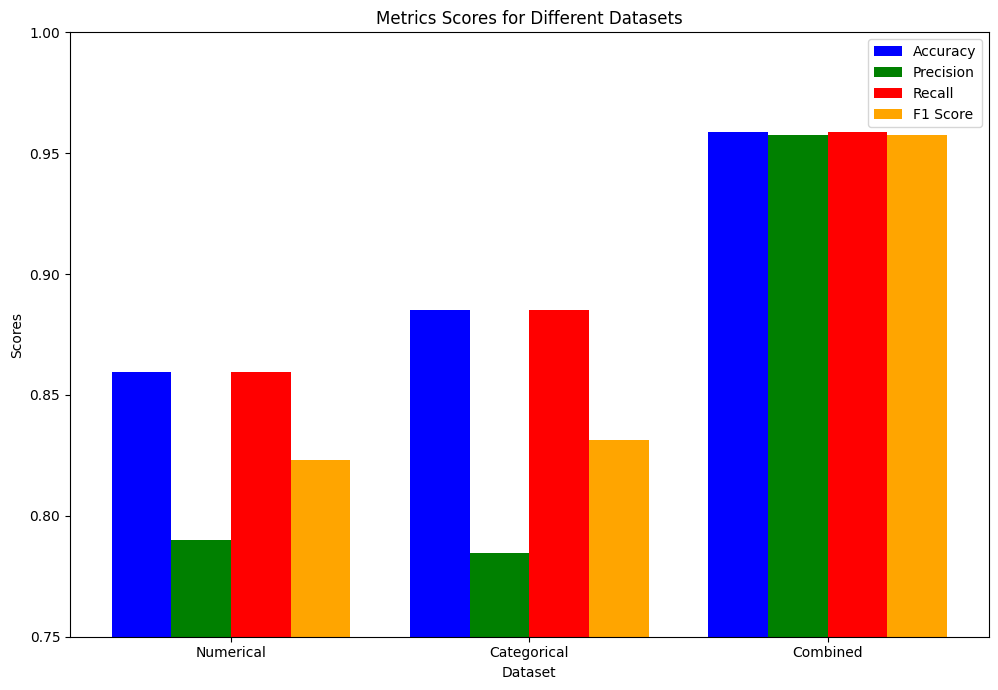

In [117]:
# Define metric names and their corresponding scores
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [test_accuracies, precisions, recalls, f1_scores]

# Define bar positions
bar_width = 0.2
num_datasets = len(metric_scores[0])
index = np.arange(num_datasets)

# Plot grouped bar chart for each metric
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'orange']  # colors for each metric
for i, (metric_name, scores) in enumerate(zip(metric_names, metric_scores)):
    plt.bar(index + i * bar_width, scores, bar_width, label=metric_name, color=colors[i])

# Customize plot
plt.xlabel('Dataset')
plt.ylabel('Scores')
plt.title('Metrics Scores for Different Datasets')
plt.xticks(index + bar_width * (len(metric_names) - 1) / 2, ['Numerical', 'Categorical', 'Combined'])
plt.legend()
plt.tight_layout()

# Adjust y-axis limits
plt.ylim(0.75, 1)  # Set the y-axis limits from 0 to 1

# Show plot
plt.show()

## MODEL COMPARISON

In [118]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
models = ['Decision Tree', 'Logistic Regression', 'SVM', 'KNN']
accuracies = [dt_accuracy, lr_accuracy, svm_accuracy, knn_accuracy]
precisions = [dt_precision, lr_precision, svm_precision, knn_precision]
recalls = [dt_recall, lr_recall, svm_recall, knn_recall]

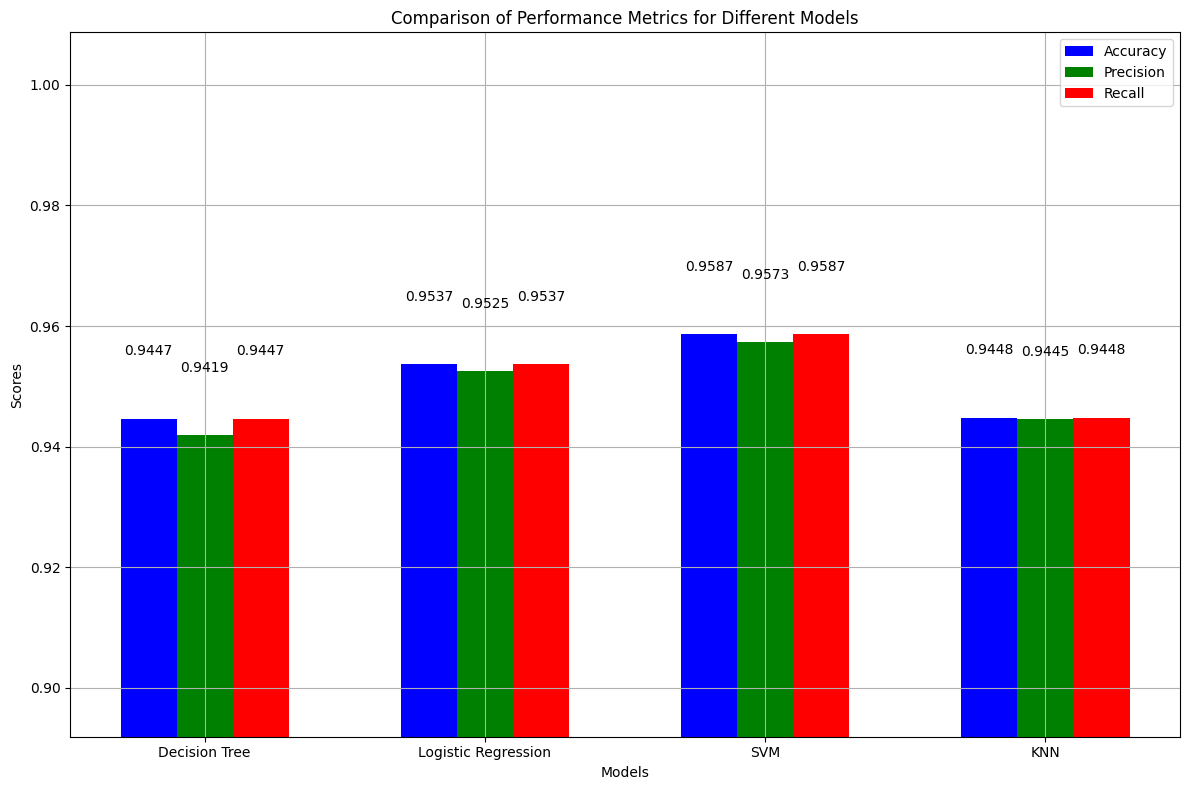

In [126]:
# Set the colors for each metric
colors = ['b', 'g', 'r']

# Plot grouped bar chart for accuracy, precision, and recall in one graph
plt.figure(figsize=(12, 8))

bar_width = 0.2
index = range(len(models))

# Plot accuracy bars
plt.bar([i - bar_width for i in index], accuracies, color=colors[0], width=bar_width, label='Accuracy')

# Plot precision bars
plt.bar(index, precisions, color=colors[1], width=bar_width, label='Precision')

# Plot recall bars
plt.bar([i + bar_width for i in index], recalls, color=colors[2], width=bar_width, label='Recall')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics for Different Models')
plt.xticks(index, models)
plt.legend()

# Annotate bars with their values
for i, metric_values in enumerate(zip(accuracies, precisions, recalls)):
    for j, value in enumerate(metric_values):
        plt.text(i + (j - 1) * bar_width, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

# Adjust y-axis limits based on the values
plt.ylim(min(min(accuracies), min(precisions), min(recalls)) - 0.05, max(max(accuracies), max(precisions), max(recalls)) + 0.05)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()


## CONCLUSION

The evaluation of classification models, including Decision Tree, Logistic Regression, SVM, and KNN, based on accuracy, precision, and recall metrics reveals valuable insights into their performance in categorizing financial transactions within the Open Metaverse dataset.

The SVM model emerged as the top performer in terms of accuracy, achieving an impressive score of approximately 95.87%. This indicates its superior ability to accurately classify transactions into low, moderate, or high-risk tiers. Following closely behind, Logistic Regression and KNN demonstrated strong performances, with accuracies around 95.37% and 94.48%, respectively. Decision Tree also exhibited commendable accuracy, scoring above 94%.

Precision analysis further illuminates the models' capabilities in minimizing false positives. SVM and Logistic Regression stood out with precision scores of approximately 95.73% and 95.25%, respectively, showcasing their effectiveness in correctly identifying high-risk transactions while minimizing misclassifications. Decision Tree and KNN also demonstrated strong precision scores, hovering around 94.19% and 94.45%, respectively.

When considering recall, which measures the models' ability to capture all actual positive instances, SVM once again excelled with a score of approximately 95.87%. Logistic Regression closely trailed with a recall score of around 95.37%, indicating its capability to identify a significant portion of high-risk transactions. Additionally, Decision Tree and KNN exhibited robust recall scores, both surpassing the 94% mark.

In summary, while all models showcased commendable performances, SVM emerged as the most suitable choice for this classification task within the Open Metaverse dataset. Its high accuracy, precision, and recall scores highlight its effectiveness in accurately categorizing financial transactions and assessing associated risk levels. These findings underscore the importance of leveraging machine learning techniques to enhance fraud detection, risk assessment, and security management within virtual ecosystems, ultimately fostering a safer and more trustworthy financial landscape within the Open Metaverse.
